In [91]:
import pandas as pd
data=pd.read_csv("train.csv")
tdata=pd.read_csv("test.csv")

In [102]:
def strip_cabin(string):
    if string:
        return 1
    else:
        return 0

def find_women_and_children(string):
    substrings=["Miss", "Master"]
    for s in substrings:
        if s in string:
            return 1
        else:
            return 0

In [103]:
def prep(df):
    features=["Name","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Cabin"] #,"Cabin"
    tmp=df[features]
    tmp["Cabin"].fillna(0,inplace=True)
    tmp["Cabin"]=tmp["Cabin"].apply(strip_cabin)
    tmp["Name"] = tmp["Name"].apply(find_women_and_children)
    tmp=pd.get_dummies(tmp)
    tmp["Age"].fillna(tmp["Age"].mean(), inplace=True)
    return tmp

In [104]:
X=prep(data)
X_t=prep(tdata)
y=data["Survived"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [121]:
Model=Sequential()
Model.add(Dense(8,input_dim=12,activation="relu"))
#Model.add(Dropout(0.5))
#Model.add(Dense(4, activation='relu'))
#Model.add(Dropout(0.5))
Model.add(Dense(1, activation='sigmoid'))
Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#validation training
#hist=Model.fit(X, y,validation_split=0.33, epochs=50, batch_size=20)
hist=Model.fit(X, y, epochs=100, batch_size=20)

Epoch 1/100
891/891 [==============================] - 0s 312us/step - loss: 11.9106 - accuracy: 0.6162
Epoch 2/100
891/891 [==============================] - 0s 166us/step - loss: 8.9568 - accuracy: 0.6162
Epoch 3/100
891/891 [==============================] - 0s 159us/step - loss: 6.3531 - accuracy: 0.6162
Epoch 4/100
891/891 [==============================] - 0s 158us/step - loss: 3.9814 - accuracy: 0.6162
Epoch 5/100
891/891 [==============================] - 0s 166us/step - loss: 1.9285 - accuracy: 0.5993
Epoch 6/100
891/891 [==============================] - 0s 162us/step - loss: 0.9161 - accuracy: 0.5802
Epoch 7/100
891/891 [==============================] - 0s 172us/step - loss: 0.7494 - accuracy: 0.6465
Epoch 8/100
891/891 [==============================] - 0s 156us/step - loss: 0.6916 - accuracy: 0.6734
Epoch 9/100
891/891 [==============================] - 0s 160us/step - loss: 0.6587 - accuracy: 0.6891
Epoch 10/100
891/891 [==============================] - 0s 158us/step - 

In [122]:
_,eff=Model.evaluate(X, y)
print("Efficiency: %s" % eff)

891/891 [==============================] - 0s 74us/step
Efficiency: 0.8092031478881836


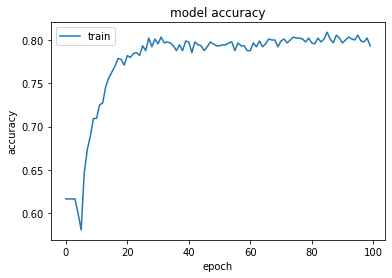

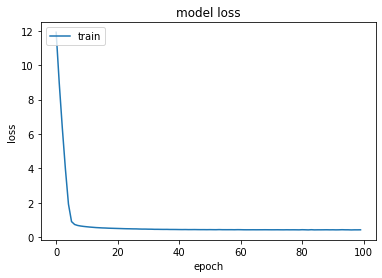

In [123]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

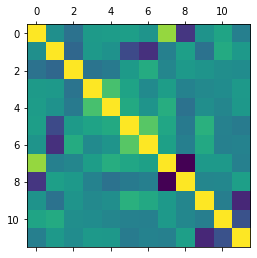

In [124]:
plt.matshow(X.corr())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


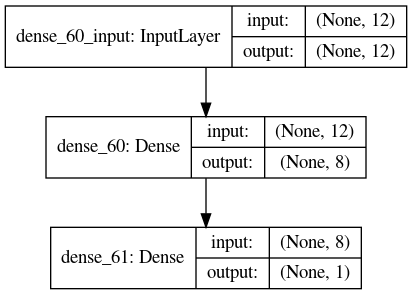

In [125]:
print(Model.summary())
from keras.utils.vis_utils import plot_model
plot_model(Model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [126]:
predictions=Model.predict(X_t)
output = pd.DataFrame({'PassengerId': tdata.PassengerId, 'Survived': predictions.flatten()})
output["Survived"]=output["Survived"].apply(lambda x : 1 if x>0.5 else 0)
output.to_csv('my_submission.csv', index=False)